# Isomap

Visualization technique.  

We need knn's to construct a neighborhood graph, where each point is connected to each of its k-neighbors.  

The graphs edge length (weight) is the Euclidean distance between each point. It is the geodesic distance, ie, the shortest distance between two points on a surface. On a plance, this is the Euclidean distance.

We want to comput the shortest path between two nodes using:  
- Dijkstra's algorithm  
- Floyd-Warshall algorithm  

Then we compute the lower-dimensional embedding using MDS (multidimensional scaling) by default.

## Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler

## Get Data

In [3]:
def get_data():
    df = pd.read_csv("crabs.csv")

    # re-format data
    df.rename(columns={
        "sp": "species", "FL": "Frontal Lobe", "RW": "Rear Width", "CL": "Carapace Midline", "CW": "Maximum Width", "BD": "Body Depth"
    }, inplace=True)

    # remap cat var designator
    df["species"] = df["species"].map({
        "B": "Blue", "O": "Orange"
    })

    df["sex"] = df["sex"].map({
        "M": "Male", "F": "Female"
    })

    # Add a species designation, whic is going to be unique combo of sex and species
    df["class"] = df["species"] + df["sex"]

    return df

In [4]:
df = get_data()

# Select data columns
data_columns = ["Frontal Lobe", "Rear Width", "Carapace Midline", "Maximum Width", "Body Depth"]

df.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


## Scale Data

In [15]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df.copy(deep=True)
df_scaled[data_columns] = MinMaxScaler().fit_transform(df_scaled[data_columns])

## Apply to 2D

In [16]:
from sklearn.manifold import Isomap

df_isomap = df.copy(deep=True)

isomap = Isomap(n_components=2, n_neighbors=10)
df_scaled[["ISOMAP1", "ISOMAP2"]] = isomap.fit_transform(df_scaled[data_columns])
df_scaled.head()

# Error we have with embedding. 
print("Reconstruction Error:\n", isomap.reconstruction_error())

Reconstruction Error:
 0.009501240251169961


## Plot 2D

<Axes: xlabel='ISOMAP1', ylabel='ISOMAP2'>

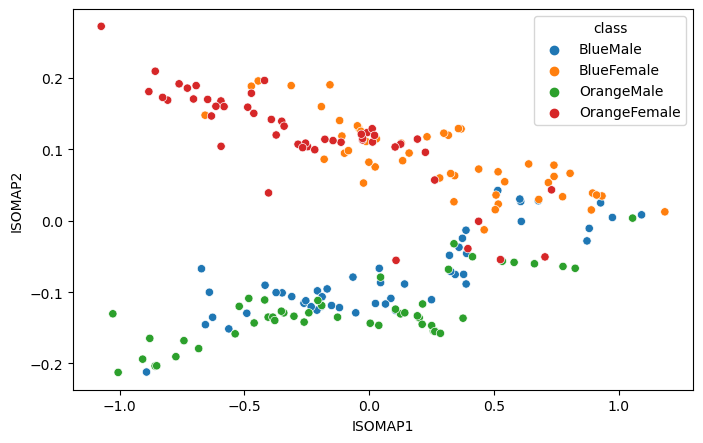

In [17]:
import seaborn as sns

fig = plt.figure(figsize=(8, 8/1.618))

sns.scatterplot(x="ISOMAP1", y="ISOMAP2", hue="class", data=df_scaled)

## Conclusion 1

You can see for the similar / close set, the values in feature column 2 is the most similar for the Orange Femle and Blue Female class.

For the distance set, it doesn't appear that different. I'm not sure what to make of tha tresult. 

We can see the class OrangeFemale is very difference from the class OrangeMale for points with lower ISOMAP1 values. This can be backtraced to the original data for the corresponding rows and the original data. For example:  (although it's not quite showing up in the data like I would expect).

OrangeFemale ISOMAP ~ -1
198	199	Orange	Female	49	0.962264	0.781022	0.860182	0.842667	0.883871	OrangeFemale	-0.882489	0.180434
199	200	Orange	Female	50	1.000000	1.000000	0.957447	0.944000	0.967742	OrangeFemale	-1.073383	0.271781

OrangeMale ISOMAP ~ -1
148	149	Orange	Male	49	0.993711	0.751825	0.987842	0.933333	0.993548	OrangeMale	-1.026765	-0.130460
149	150	Orange	Male	50	1.000000	0.671533	1.000000	0.952000	1.000000	OrangeMale	-1.005545	-0.212495

BlueFemale ISOMAP ~ -1
98	99	Blue	Female	49	0.647799	0.744526	0.726444	0.730667	0.703226	BlueFemale	-0.471890	0.187994
99	100	Blue	Female	50	0.754717	0.729927	0.796353	0.821333	0.774194	BlueFemale	-0.657248	0.147431



In [27]:
df_scaled[df_scaled["class"] == "BlueFemale"]

# Close
# 97	Blue	Female	48	0.641509	0.759124	0.714286	0.720000	0.677419	BlueFemale	-0.444439	0.195320
# 98	Blue	Female	49	0.647799	0.744526	0.726444	0.730667	0.703226	BlueFemale	-0.471890	0.187994
# 99	Blue	Female	50	0.754717	0.729927	0.796353	0.821333	0.774194	BlueFemale	-0.657248	0.147431

# 199	Orange	Female	50	1.000000	1.000000	0.957447	0.944000	0.967742	OrangeFemale	-1.073383	0.271781
# 198	Orange	Female	49	0.962264	0.781022	0.860182	0.842667	0.883871	OrangeFemale	-0.882489	0.180434
# 194	Orange	Female	45	0.886792	0.868613	0.884498	0.834667	0.896774	OrangeFemale	-0.856877	0.208942


# # Distant
# 147	Orange	Male	48	0.937107	0.678832	0.908815	0.866667	0.929032	OrangeMale	-0.878787	-0.164860
# 148	Orange	Male	49	0.993711	0.751825	0.987842	0.933333	0.993548	OrangeMale	-1.026765	-0.130460
# 149	Orange	Male	50	1.000000	0.671533	1.000000	0.952000	1.000000	OrangeMale	-1.005545	-0.212495



,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,ISOMAP1,ISOMAP2
50,Blue,Female,1,0.000000,0.000000,0.000000,0.000000,0.000000,BlueFemale,1.184628,0.012185
51,Blue,Female,2,0.113208,0.145985,0.139818,0.149333,0.103226,BlueFemale,0.895113,0.038470
52,Blue,Female,3,0.119497,0.116788,0.115502,0.120000,0.103226,BlueFemale,0.932880,0.034374
53,Blue,Female,4,0.119497,0.124088,0.136778,0.136000,0.103226,BlueFemale,0.911195,0.035722
54,Blue,Female,5,0.144654,0.124088,0.148936,0.141333,0.109677,BlueFemale,0.890035,0.014842
55,Blue,Female,6,0.163522,0.175182,0.173252,0.181333,0.174194,BlueFemale,0.805040,0.066082
56,Blue,Female,7,0.182390,0.204380,0.188450,0.194667,0.148387,BlueFemale,0.774975,0.033326
57,Blue,Female,8,0.194969,0.218978,0.200608,0.202667,0.180645,BlueFemale,0.740838,0.061729
58,Blue,Female,9,0.201258,0.233577,0.212766,0.221333,0.141935,BlueFemale,0.740315,0.077502
59,Blue,Female,10,0.226415,0.218978,0.237082,0.245333,0.193548,BlueFemale,0.679639,0.029540


## Apply to 3D

In [6]:
# df_isomap = df.copy(deep=True)

isomap = Isomap(n_components=3, n_neighbors=10)
df_scaled[["ISOMAP1", "ISOMAP2", "ISOMAP3"]] = isomap.fit_transform(df_scaled[data_columns])

print("ReconstructionError\n", isomap.reconstruction_error())

ReconstructionError
 0.007640087707467262


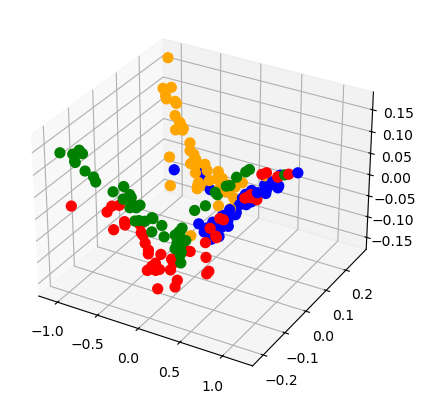

In [7]:
fig = plt.figure(figsize=(8, 8 / 1.618));
ax = fig.add_subplot(111, projection="3d");

color = {"BlueFemale": "blue", "BlueMale": "red", "OrangeMale": "g", "OrangeFemale": "orange"};

plt.scatter(
    df_scaled["ISOMAP1"], df_scaled["ISOMAP2"], zs=df_scaled["ISOMAP3"], 
    depthshade=False,
    s=50, c=df_scaled["class"].apply(lambda x: color[x])
);

## Plotly Express

In [8]:
import plotly.express as px

fig = px.scatter_3d(df_scaled, x="ISOMAP1", y="ISOMAP2", z="ISOMAP3", color="class")
fig.show()

Again, you can see Organe Male and Blue Male have similar clusterings compared to Orange Female and Blue Female, suggesting the original data for those respective classes likely has similar features.

Let's check it out:  

Again it seems the second, and fourth features are the most similar.
What about the... less likely class?

Very different all features are very different this time around, which aligns with our suspicions. 

In [28]:
# df_scaled[df_scaled["class"] == "OrangeFemale"] #.2, -.10, -0.05 # -.7, .2 .1

# similar
# 116	Orange	Male	17	0.440252	0.350365	0.440729	0.402667	0.477419	OrangeMale	0.200551	-0.136071	-0.021914
# 117	Orange	Male	18	0.465409	0.350365	0.462006	0.437333	0.432258	OrangeMale	0.193202	-0.133292	-0.051610
# 118	Orange	Male	19	0.471698	0.335766	0.434650	0.400000	0.451613	OrangeMale	0.212475	-0.145140	0.007227

# 17	Blue	Male	18	0.371069	0.321168	0.413374	0.408000	0.329032	BlueMale	0.326668	-0.071188	-0.045027
# 18	Blue	Male	19	0.383648	0.335766	0.398176	0.405333	0.335484	BlueMale	0.321797	-0.048665	-0.022667
# 19	Blue	Male	20	0.421384	0.335766	0.440729	0.432000	0.387097	BlueMale	0.249927	-0.110752	-0.051307
# 20	Blue	Male	21	0.446541	0.372263	0.504559	0.490667	0.425806	BlueMale	0.141959	-0.088797	-0.065959

#dissimilar
# 194	Orange	Female	45	0.886792	0.868613	0.884498	0.834667	0.896774	OrangeFemale	-0.856877	0.208942	0.132072
# 195	Orange	Female	46	0.893082	0.839416	0.805471	0.776000	0.812903	OrangeFemale	-0.761320	0.191310	0.111087
# 196	Orange	Female	47	0.911950	0.773723	0.820669	0.802667	0.870968	OrangeFemale	-0.807164	0.168443	0.123783

